### Task 1
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

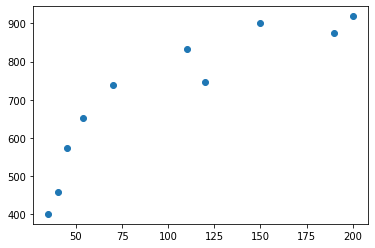

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

fig, ax = plt.subplots()
ax.scatter(zp, ks)
plt.show()
# визуальное представление говорит о возможной линейной зависимости

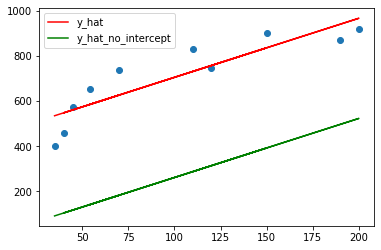

In [24]:
#считаем коэффициенты
b = (np.mean(zp*ks)-np.mean(zp)*np.mean(ks))/(np.mean(zp**2)-np.mean(zp)**2)
a = np.mean(ks) - b*np.mean(zp)
y_hat = a + b*zp
y_hat_wo_intercep = b*zp


fig, ax = plt.subplots()
ax.scatter(zp, ks)
ax.plot(zp,y_hat, "red", label = 'y_hat')
ax.plot(zp,y_hat_wo_intercep, "green",label = 'y_hat_no_intercept')
ax.legend()
plt.show()

# Task 2
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept). 

In [55]:
n = len(zp)

def mse(b1, y=zp, x=ks, n=n):
    return np.sum((b1*x-y)**2)/n
alpha = 1e-7
b1 = 0.1
for i in range(20000):
    b1 -= alpha*(2/n)*np.sum((b1*zp - ks)*zp)
    if i>=11256 and i<11274 :
        print(f"{i} , {b1}                   , {mse(b1)}")

11256 , 5.889820420132516                   , 17597217.43772219
11257 , 5.889820420132517                   , 17597217.437722195
11258 , 5.8898204201325175                   , 17597217.4377222
11259 , 5.889820420132518                   , 17597217.437722214
11260 , 5.889820420132519                   , 17597217.437722214
11261 , 5.88982042013252                   , 17597217.437722217
11262 , 5.889820420132521                   , 17597217.437722225
11263 , 5.889820420132522                   , 17597217.43772223
11264 , 5.889820420132523                   , 17597217.437722236
11265 , 5.889820420132524                   , 17597217.437722243
11266 , 5.889820420132525                   , 17597217.437722247
11267 , 5.8898204201325255                   , 17597217.437722247
11268 , 5.889820420132526                   , 17597217.43772226
11269 , 5.889820420132527                   , 17597217.437722262
11270 , 5.889820420132528                   , 17597217.43772227
11271 , 5.889820420132528     

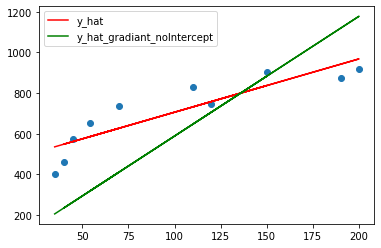

In [58]:
# берем b = 5.889820420132528
b_grad = 5.889820420132528
y_hat_wo_intercep = b_grad*zp
fig, ax = plt.subplots()
ax.scatter(zp, ks)
ax.plot(zp,y_hat, "red", label = 'y_hat')
ax.plot(zp,y_hat_wo_intercep, "green",label = 'y_hat_gradiant_noIntercept')
ax.legend()
plt.show()

### Task 3
*3. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [67]:
alpha = 1e-7
b1 = 0.1
for i in range(20000):
    b1 -= alpha*(2/n) * np.sum((b1*zp - ks)*zp)
    a -= alpha*(2/n) *np.sum(b1*zp - ks)
    if i%100 ==0 :
        print(f"{i} ,     {a}    , {b1}                   , {mse(b1)}")

0 ,     455.0769104121002    , 0.115952808                   , 2144.782438397426
100 ,     455.08938262591516    , 1.508150707906618                   , 984592.6772242452
200 ,     455.09939088479206    , 2.564661140987428                   , 3112760.533454539
300 ,     455.107529298801    , 3.3664252402462145                   , 5524024.938175716
400 ,     455.1142487258892    , 3.974867571464616                   , 7812437.973833379
500 ,     455.11989131290505    , 4.436601977832683                   , 9813148.022477262
600 ,     455.1247167080756    , 4.78700274892489                   , 11483529.20028299
700 ,     455.1289219531153    , 5.052914707593488                   , 12838731.730076633
800 ,     455.1326565789393    , 5.254709839329553                   , 13917606.888221193
900 ,     455.13603406149286    , 5.407848026104846                   , 14765391.275435358
1000 ,     455.1391405153427    , 5.524061455274668                   , 15425486.237093994
1100 ,     455.142041

10500 ,     455.3559023937316    , 5.889820420131174                   , 17597217.43771396
10600 ,     455.3581558379198    , 5.889820420131542                   , 17597217.437716223
10700 ,     455.36040928210804    , 5.889820420131814                   , 17597217.43771789
10800 ,     455.36266272629626    , 5.889820420132015                   , 17597217.43771912
10900 ,     455.3649161704845    , 5.889820420132192                   , 17597217.437720213
11000 ,     455.3671696146727    , 5.889820420132288                   , 17597217.437720798
11100 ,     455.36942305886095    , 5.889820420132377                   , 17597217.43772134
11200 ,     455.3716765030492    , 5.889820420132466                   , 17597217.437721886
11300 ,     455.3739299472374    , 5.889820420132528                   , 17597217.43772227
11400 ,     455.3761833914256    , 5.889820420132528                   , 17597217.43772227
11500 ,     455.37843683561385    , 5.889820420132528                   , 17597217.

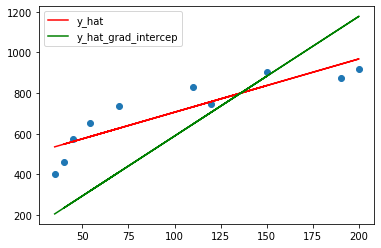

In [68]:
a_grad = 455.3739299472374    
b_grad = 5.889820420132528
y_hat_intercep = a_grad + b_grad*zp
fig, ax = plt.subplots()
ax.scatter(zp, ks)
ax.plot(zp,y_hat, "red", label = 'y_hat')
ax.plot(zp,y_hat_wo_intercep, "green",label = 'y_hat_grad_intercep')
ax.legend()
plt.show()